In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Dice Simulation

Alice wants to join her school's Probability Student Club. Membership dues are computed via one of two simple probabilistic games. The first game: roll a die repeatedly. Stop rolling once you get a five followed by a six. Your number of rolls is the amount you pay, in dollars. The second game: same, except that the stopping condition is a five followed by a five.

Which of the two games should Alice elect to play? Does it even matter? Write a program to simulate the two games and calculate their expected value.

In [38]:
def game_one(): 
    tosses = [] 
    tosses = [random.choice([1,2,3,4,5,6])] # initialize with a toss
    condition_met = True
    
    while condition_met: 
        roll_result = random.choice([1,2,3,4,5,6]) 
        tosses.append(roll_result)
        # tosses[-2] is the 2nd to last item in the list
        # remember, we just put in roll_result as the last item. 
        if tosses[-2] == 5 and roll_result == 6:    
            condition_met = False
    
    num_tosses = len(tosses) 
    return num_tosses, tosses[-15:] # give me the last 5 in tosses

In [39]:
game_one()

(13, [2, 1, 1, 3, 1, 1, 3, 6, 6, 4, 1, 5, 6])

In [40]:
def game_one_simulation(): 
    results = [] 
    n_trials = 1000
    
    for i in range(n_trials): 
        num_tosses, _ = game_one() # we don't care about tosses[-5:] now
        results.append(num_tosses) 
    
    EV_game = sum(results)/len(results) 
    return EV_game

In [41]:
game_one_simulation()

35.988

In [62]:
def game_two(): 
    tosses = []
    tosses = [random.choice([1,2,3,4,5,6])]
    condition_met = True
    
    while condition_met: 
        roll_result = random.choice([1,2,3,4,5,6])
        tosses.append(roll_result)
        if tosses[-2] == 5 and roll_result == 5: 
            condition_met = False
            
    num_tosses = len(tosses)
    return num_tosses, tosses[-15:] 

In [63]:
game_two()

(56, [5, 4, 3, 4, 1, 5, 1, 6, 4, 2, 4, 3, 6, 5, 5])

In [78]:
def game_two_simulation(): 
    results = [] 
    n_trials = 1000
    
    for i in range(n_trials): 
        num_tosses, _ = game_two()
        results.append(num_tosses) 
        
    EV_game = sum(results)/len(results)
    return EV_game

In [79]:
game_two_simulation()

40.704

# Now let's run the same analysis but let's collect all of the results.

Ultimately we are going to run a histogram of the results and check to see if the central limit theorem holds here. It should look normally distributed because what we have is a distribution of the means. 


In [89]:
def game_two_avg_collector(): 
    m_trials = 250
    EV_collector = [] 
    
    for i in range(m_trials): 
        EV_i = game_two_simulation()
        EV_collector.append(EV_i) 
    
    return EV_collector 

In [90]:
# this will take a while to load.. 500 * 1000 trials = 500,000 passes 
five_five_values = game_two_avg_collector()

(array([  1.,   0.,   1.,   2.,   3.,   3.,  15.,  13.,  20.,  17.,  34.,
         33.,  23.,  17.,  16.,  24.,  11.,  12.,   2.,   3.]),
 array([ 37.489 ,  37.8816,  38.2742,  38.6668,  39.0594,  39.452 ,
         39.8446,  40.2372,  40.6298,  41.0224,  41.415 ,  41.8076,
         42.2002,  42.5928,  42.9854,  43.378 ,  43.7706,  44.1632,
         44.5558,  44.9484,  45.341 ]),
 <a list of 20 Patch objects>)

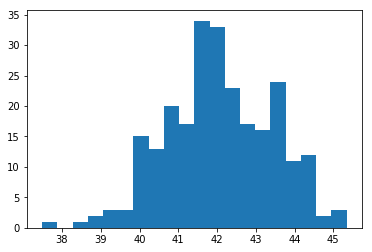

In [92]:
plt.hist(five_five_values, 20) # Cool, looks normally distributed.

In [93]:
# Let's find the average of X_values 
average = sum(five_five_values)/len(five_five_values)
print(average)

42.06715999999998


# Cool, that looks normally distributed. Let's put them on the same histogram to get a better comparison..

In [94]:
def game_one_avg_collector(): 
    m_trials = 250
    EV_collector = [] 
    
    for i in range(m_trials): 
        EV_i = game_one_simulation()
        EV_collector.append(EV_i) 
    
    return EV_collector

In [95]:
five_six_values = game_one_avg_collector()

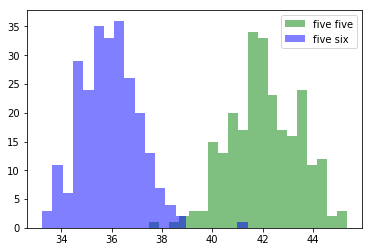

In [108]:
# Put the two distributions on the same distribution plot. 
plt.hist(five_five_values, 20, alpha = 0.5, label='five five', color = 'g')
plt.hist(five_six_values, 20, alpha = 0.5, label ='five six', color = 'b')
plt.legend(loc='upper right')
plt.show()

# Now those look clearly different!